In [1]:
import torch
import d2l_tools as d2l
from torch import nn

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [2]:
num_inputs, num_outputs, num_hiddens = 784, 10, [256,128]

W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens[0],requires_grad=True)*0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens[0],requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens[0], num_hiddens[1], requires_grad=True)*0.01)
b2 = nn.Parameter(torch.zeros(num_hiddens[1],requires_grad=True))
W3 = nn.Parameter(torch.randn(num_hiddens[1], num_outputs, requires_grad=True)*0.01)
b3 = nn.Parameter(torch.zeros(num_outputs,requires_grad=True))

params = [W1, b1, W2, b2, W3, b3]

In [3]:
# 激活函数
def relu(x):
    a = torch.zeros_like(x)
    return torch.max(x,a)

In [4]:
# 模型

def net(x):
    x = x.reshape((-1, num_inputs))
    H1 = relu(x @ W1 + b1) # @ 为矩阵乘法运算
    H2 = relu(H1 @ W2 + b2)
    return (H2 @ W3 + b3)

In [5]:
# 损失函数
loss = nn.CrossEntropyLoss(reduction="none")

(0.4039352174123128, 0.8555, 0.8444)

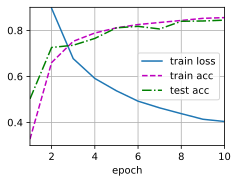

In [6]:
# 训练
num_epochs = 10

updater = torch.optim.SGD(params, lr=0.1)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

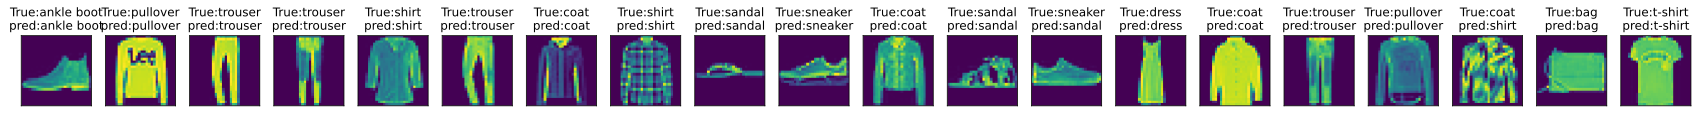

In [7]:
d2l.predict_ch3(net, test_iter, n=20)

***练习:超参数如何设置***
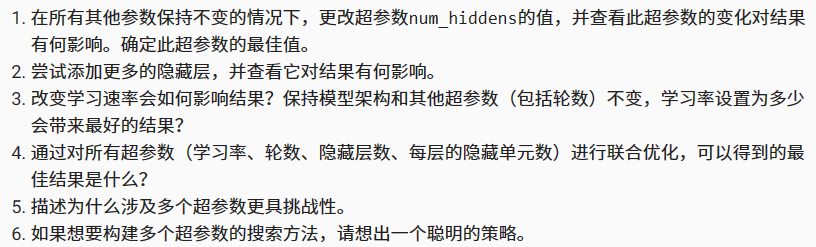

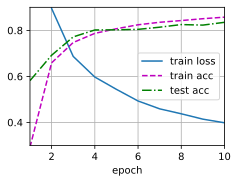

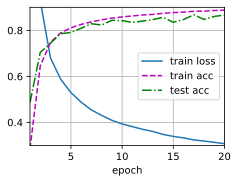

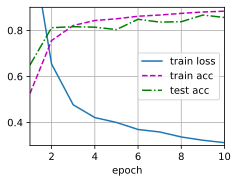

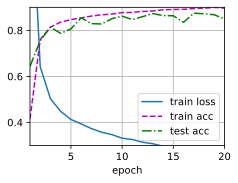

In [8]:
# 超参数搜索方法 
"""
方法一:试错（就是碰运气） pass

方法二:网格搜索（适用于小于4个超参数的模型）

方法三:随机搜索（搜索空间包含3到4个维度，尽量使用随机搜索）

方法四:贝叶斯优化器

"""
# 网格搜索 （4个超参数:学习率、轮数、隐藏层数、每层的隐藏单元）  时间复杂度贼大
# 以 lr 与 num_epochs为例
num_inputs, num_outputs, num_hiddens = 784, 10, [256,128]

target = []

lrs = [0.1, 0.5]
num_epochs = [10, 20]
for lr in lrs:
    for num_epoch in num_epochs:
        W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens[0],requires_grad=True)*0.01)
        b1 = nn.Parameter(torch.zeros(num_hiddens[0],requires_grad=True))
        W2 = nn.Parameter(torch.randn(num_hiddens[0], num_hiddens[1], requires_grad=True)*0.01)
        b2 = nn.Parameter(torch.zeros(num_hiddens[1],requires_grad=True))
        W3 = nn.Parameter(torch.randn(num_hiddens[1], num_outputs, requires_grad=True)*0.01)
        b3 = nn.Parameter(torch.zeros(num_outputs,requires_grad=True))
        params = [W1, b1, W2, b2, W3, b3]
        updater = torch.optim.SGD(params, lr)
        target.append(d2l.train_ch3(net, train_iter, test_iter, loss, num_epoch, updater))

In [9]:
target

[(0.39829020404815674, 0.8573833333333334, 0.835),
 (0.3075949789683024, 0.8876333333333334, 0.8669),
 (0.3118680601755778, 0.8833833333333333, 0.8559),
 (0.27212346674601234, 0.8968666666666667, 0.8494)]

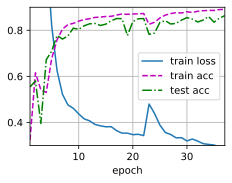

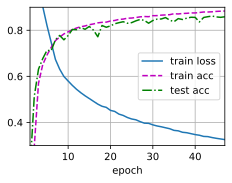

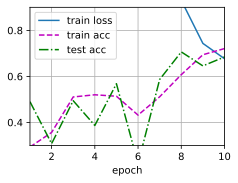

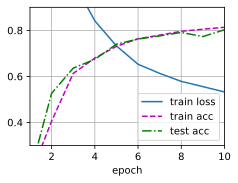

In [10]:
# 随机搜索
num_inputs, num_outputs, num_hiddens = 784, 10, [256,128]

target = []

Hyperparameter = []

import random

for i in range(4):
    lr = random.uniform(0.01,0.8)
    num_epoch = random.randint(10,50)
    Hyperparameter.append({i:(lr, num_epoch)})
    W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens[0],requires_grad=True)*0.01)
    b1 = nn.Parameter(torch.zeros(num_hiddens[0],requires_grad=True))
    W2 = nn.Parameter(torch.randn(num_hiddens[0], num_hiddens[1], requires_grad=True)*0.01)
    b2 = nn.Parameter(torch.zeros(num_hiddens[1],requires_grad=True))
    W3 = nn.Parameter(torch.randn(num_hiddens[1], num_outputs, requires_grad=True)*0.01)
    b3 = nn.Parameter(torch.zeros(num_outputs,requires_grad=True))
    params = [W1, b1, W2, b2, W3, b3]
    updater = torch.optim.SGD(params, lr)
    target.append(d2l.train_ch3(net, train_iter, test_iter, loss, num_epoch, updater))

In [11]:
Hyperparameter,target

([{0: (0.7530744657144933, 37)},
  {1: (0.033471761115254066, 47)},
  {2: (0.7322816676508234, 10)},
  {3: (0.043271063740541106, 10)}],
 [(0.2894473697980245, 0.89095, 0.8635),
  (0.3254964625676473, 0.8836, 0.8586),
  (0.6767414374669393, 0.7208666666666667, 0.6844),
  (0.5322517154693603, 0.81345, 0.8027)])

In [12]:
# 贝叶斯优化器 (待完成)


无论是哪种优化其实用处都有局限性（假如你有幸成为天选之子，初始化的特别好，那么这些反而成为了累赘）
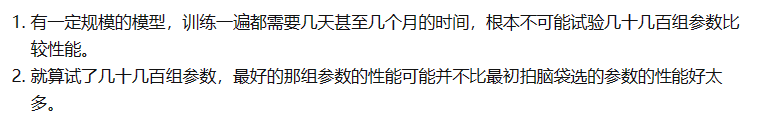

***沐神:若把权重初始化全设为0会如何***

In [13]:
W1 = nn.Parameter(torch.zeros(num_inputs, num_hiddens[0],requires_grad=True))
b1 = nn.Parameter(torch.zeros(num_hiddens[0],requires_grad=True))
W2 = nn.Parameter(torch.zeros(num_hiddens[0], num_hiddens[1], requires_grad=True))
b2 = nn.Parameter(torch.zeros(num_hiddens[1],requires_grad=True))
W3 = nn.Parameter(torch.zeros(num_hiddens[1], num_outputs, requires_grad=True))
b3 = nn.Parameter(torch.zeros(num_outputs,requires_grad=True))

params = [W1, b1, W2, b2, W3, b3]

(2.3027181615193686, 0.0984, 0.1)

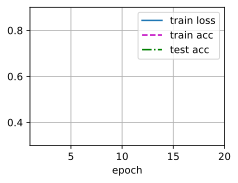

In [14]:
num_epochs = 20

updater = torch.optim.SGD(params, lr=0.1)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

# w和b全设置为0，会导致整个隐藏层相当于只有一个节点 

In [15]:
W1 = nn.Parameter(torch.zeros(num_inputs, num_hiddens[0],requires_grad=True))
b1 = nn.Parameter(torch.randn(num_hiddens[0],requires_grad=True))
W2 = nn.Parameter(torch.zeros(num_hiddens[0], num_hiddens[1], requires_grad=True))
b2 = nn.Parameter(torch.randn(num_hiddens[1],requires_grad=True))
W3 = nn.Parameter(torch.zeros(num_hiddens[1], num_outputs, requires_grad=True))
b3 = nn.Parameter(torch.randn(num_outputs,requires_grad=True))

params = [W1, b1, W2, b2, W3, b3]

(2.3031057271321616, 0.0971, 0.1)

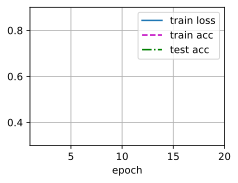

In [16]:
num_epochs = 20

updater = torch.optim.SGD(params, lr=0.5)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)
# 两次测试w都为0，效果都很差（最终测试集准确率0.1），因此不建议让w=0作为初始化